bla bla hello this is un apdate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import random

# -----------------------------------

def generate_vector(n):
    random.seed(42)
    return [random.random() for _ in range(n)]

def measure_time(func, v, runs=5):
    func(v)  # warm-up
    times = []
    for _ in range(runs):
        start = time.perf_counter()
        func(v)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / len(times)

def measure_time_A_B(func, A, B, runs=10):
    func(A, B)  # warm-up
    times = []
    for _ in range(runs):
        start = time.perf_counter()
        func(A, B)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / len(times)

# ------------------------------------

def constant_function(v):
    return 3

def sum_elements(v):
    return sum(v)

def product_elements(v):
    product = 1
    for x in v:
        product *= x
    return product

def poly_direct(v, x=0.09):
    return sum(v[i] * (x ** i) for i in range(len(v)))

def poly_horner(v, x=1.5):
    result = 0
    for coeff in reversed(v):
        result = result * x + coeff
    return result

def bubble_sort(v):
    v = v.copy()
    n = len(v)
    for i in range(n):
        for j in range(0, n - i - 1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

def quick_sort(v):
    v = v.copy()
    def _quick_sort(arr):
        if len(arr) <= 1:
            return arr
        pivot = arr[0]
        left = [x for x in arr[1:] if x < pivot]
        right = [x for x in arr[1:] if x >= pivot]
        return _quick_sort(left) + [pivot] + _quick_sort(right)
    return _quick_sort(v)

def A_B(A, B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def timsort(v, run_size=32):
    n = len(v)
    runs = [insertion_sort(v[i:i + run_size]) for i in range(0, n, run_size)]
    while len(runs) > 1:
        new_runs = []
        for i in range(0, len(runs), 2):
            if i + 1 < len(runs):
                new_runs.append(merge(runs[i], runs[i + 1]))
            else:
                new_runs.append(runs[i])
        runs = new_runs
    return runs[0]

# ------------------------------------

def cons(n, c): return c * np.ones_like(n)
def linear(n, a, b): return a * n + b
def quadratic(n, a, b, c): return a * n**2 + b * n + c
def _nlogn(n, a, b, c): return a * n * np.log(b * n) + c

def fit_and_plot(x, y, theoretical_func, label):
    popt, _ = curve_fit(theoretical_func, x, y)
    plt.plot(x, y, 'o', label=f'{label} empirical')
    plt.plot(x, theoretical_func(np.array(x), *popt), '-', label=f'{label} theoretical')

# -----------------------------------

options = {
    "1": ("Constant Function", constant_function, cons, 2000),
    "2": ("Sum Elements", sum_elements, linear, 2000),
    "3": ("Product Elements", product_elements, linear, 2000),
    "4": ("Poly Direct", poly_direct, linear, 1500),
    "5": ("Poly Horner", poly_horner, linear, 1500),
    "6": ("Bubble Sort", bubble_sort, quadratic, 200),
    "7": ("Quick Sort", quick_sort, _nlogn, 500),
    "8": ("Timsort", timsort, _nlogn, 1000),
    "9": ("Matrix Multiplication A × B", A_B, quadratic, 200)
}

def run_benchmark(choice):
    if choice in options:
        label, tested_fun, theo_fun, size_n = options[choice]
        n = np.arange(1, size_n)
        t = []

        np.random.seed(42)

        if choice != "9":
            for size in n:
                v = np.random.rand(size)
                t_avg = measure_time(tested_fun, v)
                t.append(t_avg)
        else:
            for size in n:
                A = np.random.rand(size, size)
                B = np.random.rand(size, size)
                t_avg = measure_time_A_B(tested_fun, A, B)
                t.append(t_avg)

        fit_and_plot(n, t, theo_fun, label=label)
        plt.xlabel('Data size')
        plt.ylabel('Calculation time (seconds)')
        plt.title(f'Benchmark: {label}')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Invalid choice. Please enter a number from 1 to 9.")


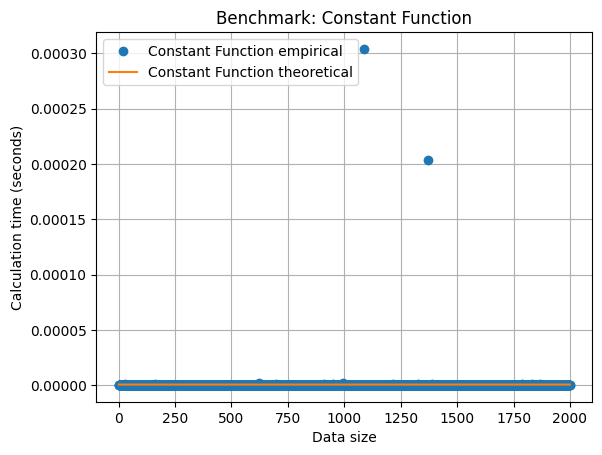

In [3]:
run_benchmark("1")


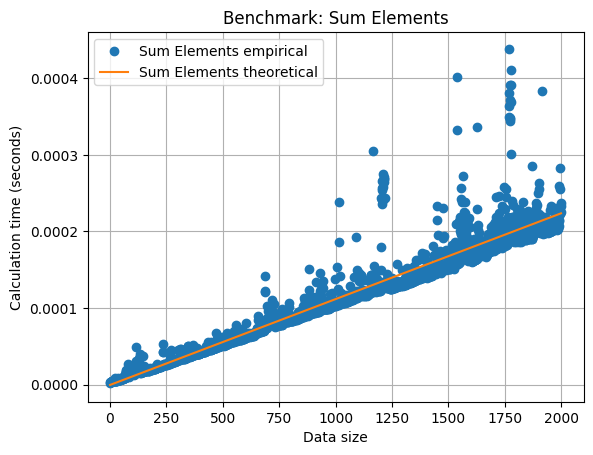

In [17]:
run_benchmark("2")

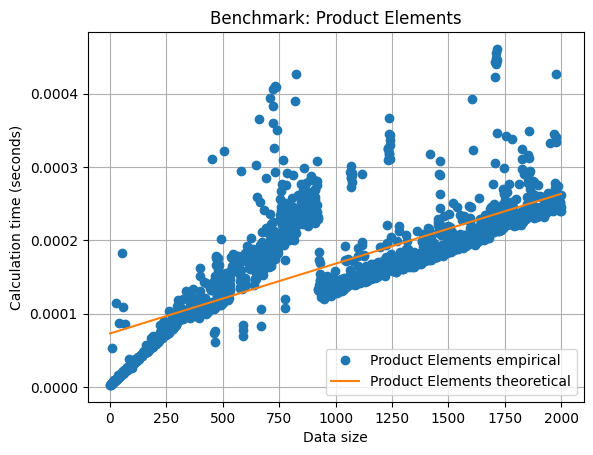

In [18]:
run_benchmark("3")

In [ ]:
run_benchmark("4")